In [3]:
# Imports
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *
from BayesianNamingGame import *
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
from matplotlib import ticker

Populating the interactive namespace from numpy and matplotlib


# Aggregate results 

The results of the many runs still have to be aggregated, before we can anlyze the effect of the parameters properly.

In [4]:
def analyze(gammas, etas, zetas, skipexisting=True,
            runs=1, firstrun=1, root='../../results/BNG06'):
    """Analyze multiple simulations and dump the results to csv files.

    It reads out all the results of the simulation with each of the 
    parameter settings (gamma, eta, zeta), then compute aggregate results
    for those settins and dumps those to a file.
    
    Args:
        gammas: iterable with values of gamma to analyze
        etas: iterable with etas
        zetas: iterable with zetas
        runs: the number of runs to analyze
        firstrun: number of the first run
        root: the directory in which to look
    """
    for gamma in gammas:
        for eta in etas:
            for zeta in zetas:
                print(f'\n>>> Start gamma={gamma}, eta={eta}, zeta={zeta}')
                name = f'BNG06-gamma-{gamma}-eta-{eta}-zeta-{zeta}'
                directory = os.path.join(root, f'gamma-{gamma}/eta-{eta}')
                src_fn = os.path.join(directory, name+'-run-{:0>4}')
                stats_fn = os.path.join(directory, name+'-stats.csv')
                divs_fn = os.path.join(directory, name+'-divs.csv')

                if not os.path.exists(src_fn.format(firstrun)): 
                    print('Does not exist, continuing')
                    continue
                    
                # Skip existing
                if skipexisting and os.path.exists(stats_fn) and os.path.exists(divs_fn):
                    print('Exists, skipping.')
                    continue

                # Analyse and dump
                div_df, stats_df, _ = analyze_BNG_simulation_runs(src_fn, runs, firstrun=firstrun)
                stats_df.to_csv(stats_fn)
                div_df.to_csv(divs_fn)

In [5]:
gammas = [1, 5, 10, 50, 1000, 'inf']
etas = [1, 2, 5, 50, 'inf']
zetas = [1, 1.5, 2, 5, 'inf']

In [6]:
analyze(gammas, etas, zetas, runs=10)


>>> Start gamma=1, eta=1, zeta=1
Exists, skipping.

>>> Start gamma=1, eta=1, zeta=1.5
Run 0010/0001 (BNG06-gamma-1-eta-1-zeta-1.5-run-0001)
Run 0010/0002 (BNG06-gamma-1-eta-1-zeta-1.5-run-0002)
Run 0010/0003 (BNG06-gamma-1-eta-1-zeta-1.5-run-0003)
Run 0010/0004 (BNG06-gamma-1-eta-1-zeta-1.5-run-0004)
Run 0010/0005 (BNG06-gamma-1-eta-1-zeta-1.5-run-0005)
Run 0010/0006 (BNG06-gamma-1-eta-1-zeta-1.5-run-0006)
Run 0010/0007 (BNG06-gamma-1-eta-1-zeta-1.5-run-0007)
Run 0010/0008 (BNG06-gamma-1-eta-1-zeta-1.5-run-0008)
Run 0010/0009 (BNG06-gamma-1-eta-1-zeta-1.5-run-0009)
Run 0010/0010 (BNG06-gamma-1-eta-1-zeta-1.5-run-0010)

>>> Start gamma=1, eta=1, zeta=2
Run 0010/0001 (BNG06-gamma-1-eta-1-zeta-2-run-0001)
Run 0010/0002 (BNG06-gamma-1-eta-1-zeta-2-run-0002)
Run 0010/0003 (BNG06-gamma-1-eta-1-zeta-2-run-0003)
Run 0010/0004 (BNG06-gamma-1-eta-1-zeta-2-run-0004)
Run 0010/0005 (BNG06-gamma-1-eta-1-zeta-2-run-0005)
Run 0010/0006 (BNG06-gamma-1-eta-1-zeta-2-run-0006)
Run 0010/0007 (BNG06-gamma

Run 0010/0005 (BNG06-gamma-1-eta-50-zeta-1.5-run-0005)
Run 0010/0006 (BNG06-gamma-1-eta-50-zeta-1.5-run-0006)
Run 0010/0007 (BNG06-gamma-1-eta-50-zeta-1.5-run-0007)
Run 0010/0008 (BNG06-gamma-1-eta-50-zeta-1.5-run-0008)
Run 0010/0009 (BNG06-gamma-1-eta-50-zeta-1.5-run-0009)
Run 0010/0010 (BNG06-gamma-1-eta-50-zeta-1.5-run-0010)

>>> Start gamma=1, eta=50, zeta=2
Run 0010/0001 (BNG06-gamma-1-eta-50-zeta-2-run-0001)
Run 0010/0002 (BNG06-gamma-1-eta-50-zeta-2-run-0002)
Run 0010/0003 (BNG06-gamma-1-eta-50-zeta-2-run-0003)
Run 0010/0004 (BNG06-gamma-1-eta-50-zeta-2-run-0004)
Run 0010/0005 (BNG06-gamma-1-eta-50-zeta-2-run-0005)
Run 0010/0006 (BNG06-gamma-1-eta-50-zeta-2-run-0006)
Run 0010/0007 (BNG06-gamma-1-eta-50-zeta-2-run-0007)
Run 0010/0008 (BNG06-gamma-1-eta-50-zeta-2-run-0008)
Run 0010/0009 (BNG06-gamma-1-eta-50-zeta-2-run-0009)
Run 0010/0010 (BNG06-gamma-1-eta-50-zeta-2-run-0010)

>>> Start gamma=1, eta=50, zeta=5
Run 0010/0001 (BNG06-gamma-1-eta-50-zeta-5-run-0001)
Run 0010/0002 (BN

Run 0010/0007 (BNG06-gamma-5-eta-2-zeta-2-run-0007)
Run 0010/0008 (BNG06-gamma-5-eta-2-zeta-2-run-0008)
Run 0010/0009 (BNG06-gamma-5-eta-2-zeta-2-run-0009)
Run 0010/0010 (BNG06-gamma-5-eta-2-zeta-2-run-0010)

>>> Start gamma=5, eta=2, zeta=5
Run 0010/0001 (BNG06-gamma-5-eta-2-zeta-5-run-0001)
Run 0010/0002 (BNG06-gamma-5-eta-2-zeta-5-run-0002)
Run 0010/0003 (BNG06-gamma-5-eta-2-zeta-5-run-0003)
Run 0010/0004 (BNG06-gamma-5-eta-2-zeta-5-run-0004)
Run 0010/0005 (BNG06-gamma-5-eta-2-zeta-5-run-0005)
Run 0010/0006 (BNG06-gamma-5-eta-2-zeta-5-run-0006)
Run 0010/0007 (BNG06-gamma-5-eta-2-zeta-5-run-0007)
Run 0010/0008 (BNG06-gamma-5-eta-2-zeta-5-run-0008)
Run 0010/0009 (BNG06-gamma-5-eta-2-zeta-5-run-0009)
Run 0010/0010 (BNG06-gamma-5-eta-2-zeta-5-run-0010)

>>> Start gamma=5, eta=2, zeta=inf
Run 0010/0001 (BNG06-gamma-5-eta-2-zeta-inf-run-0001)
Run 0010/0002 (BNG06-gamma-5-eta-2-zeta-inf-run-0002)
Run 0010/0003 (BNG06-gamma-5-eta-2-zeta-inf-run-0003)
Run 0010/0004 (BNG06-gamma-5-eta-2-zeta-


>>> Start gamma=5, eta=inf, zeta=2
Run 0010/0001 (BNG06-gamma-5-eta-inf-zeta-2-run-0001)
Run 0010/0002 (BNG06-gamma-5-eta-inf-zeta-2-run-0002)
Run 0010/0003 (BNG06-gamma-5-eta-inf-zeta-2-run-0003)
Run 0010/0004 (BNG06-gamma-5-eta-inf-zeta-2-run-0004)
Run 0010/0005 (BNG06-gamma-5-eta-inf-zeta-2-run-0005)
Run 0010/0006 (BNG06-gamma-5-eta-inf-zeta-2-run-0006)
Run 0010/0007 (BNG06-gamma-5-eta-inf-zeta-2-run-0007)
Run 0010/0008 (BNG06-gamma-5-eta-inf-zeta-2-run-0008)
Run 0010/0009 (BNG06-gamma-5-eta-inf-zeta-2-run-0009)
Run 0010/0010 (BNG06-gamma-5-eta-inf-zeta-2-run-0010)

>>> Start gamma=5, eta=inf, zeta=5
Run 0010/0001 (BNG06-gamma-5-eta-inf-zeta-5-run-0001)
Run 0010/0002 (BNG06-gamma-5-eta-inf-zeta-5-run-0002)
Run 0010/0003 (BNG06-gamma-5-eta-inf-zeta-5-run-0003)
Run 0010/0004 (BNG06-gamma-5-eta-inf-zeta-5-run-0004)
Run 0010/0005 (BNG06-gamma-5-eta-inf-zeta-5-run-0005)
Run 0010/0006 (BNG06-gamma-5-eta-inf-zeta-5-run-0006)
Run 0010/0007 (BNG06-gamma-5-eta-inf-zeta-5-run-0007)
Run 0010/0

Run 0010/0003 (BNG06-gamma-10-eta-5-zeta-1.5-run-0003)
Run 0010/0004 (BNG06-gamma-10-eta-5-zeta-1.5-run-0004)
Run 0010/0005 (BNG06-gamma-10-eta-5-zeta-1.5-run-0005)
Run 0010/0006 (BNG06-gamma-10-eta-5-zeta-1.5-run-0006)
Run 0010/0007 (BNG06-gamma-10-eta-5-zeta-1.5-run-0007)
Run 0010/0008 (BNG06-gamma-10-eta-5-zeta-1.5-run-0008)
Run 0010/0009 (BNG06-gamma-10-eta-5-zeta-1.5-run-0009)
Run 0010/0010 (BNG06-gamma-10-eta-5-zeta-1.5-run-0010)

>>> Start gamma=10, eta=5, zeta=2
Run 0010/0001 (BNG06-gamma-10-eta-5-zeta-2-run-0001)
Run 0010/0002 (BNG06-gamma-10-eta-5-zeta-2-run-0002)
Run 0010/0003 (BNG06-gamma-10-eta-5-zeta-2-run-0003)
Run 0010/0004 (BNG06-gamma-10-eta-5-zeta-2-run-0004)
Run 0010/0005 (BNG06-gamma-10-eta-5-zeta-2-run-0005)
Run 0010/0006 (BNG06-gamma-10-eta-5-zeta-2-run-0006)
Run 0010/0007 (BNG06-gamma-10-eta-5-zeta-2-run-0007)
Run 0010/0008 (BNG06-gamma-10-eta-5-zeta-2-run-0008)
Run 0010/0009 (BNG06-gamma-10-eta-5-zeta-2-run-0009)
Run 0010/0010 (BNG06-gamma-10-eta-5-zeta-2-run-0

Run 0010/0003 (BNG06-gamma-50-eta-1-zeta-1-run-0003)
Run 0010/0004 (BNG06-gamma-50-eta-1-zeta-1-run-0004)
Run 0010/0005 (BNG06-gamma-50-eta-1-zeta-1-run-0005)
Run 0010/0006 (BNG06-gamma-50-eta-1-zeta-1-run-0006)
Run 0010/0007 (BNG06-gamma-50-eta-1-zeta-1-run-0007)
Run 0010/0008 (BNG06-gamma-50-eta-1-zeta-1-run-0008)
Run 0010/0009 (BNG06-gamma-50-eta-1-zeta-1-run-0009)
Run 0010/0010 (BNG06-gamma-50-eta-1-zeta-1-run-0010)

>>> Start gamma=50, eta=1, zeta=1.5
Run 0010/0001 (BNG06-gamma-50-eta-1-zeta-1.5-run-0001)
Run 0010/0002 (BNG06-gamma-50-eta-1-zeta-1.5-run-0002)
Run 0010/0003 (BNG06-gamma-50-eta-1-zeta-1.5-run-0003)
Run 0010/0004 (BNG06-gamma-50-eta-1-zeta-1.5-run-0004)
Run 0010/0005 (BNG06-gamma-50-eta-1-zeta-1.5-run-0005)
Run 0010/0006 (BNG06-gamma-50-eta-1-zeta-1.5-run-0006)
Run 0010/0007 (BNG06-gamma-50-eta-1-zeta-1.5-run-0007)
Run 0010/0008 (BNG06-gamma-50-eta-1-zeta-1.5-run-0008)
Run 0010/0009 (BNG06-gamma-50-eta-1-zeta-1.5-run-0009)
Run 0010/0010 (BNG06-gamma-50-eta-1-zeta-1.5

Run 0010/0007 (BNG06-gamma-50-eta-5-zeta-inf-run-0007)
Run 0010/0008 (BNG06-gamma-50-eta-5-zeta-inf-run-0008)
Run 0010/0009 (BNG06-gamma-50-eta-5-zeta-inf-run-0009)
Run 0010/0010 (BNG06-gamma-50-eta-5-zeta-inf-run-0010)

>>> Start gamma=50, eta=50, zeta=1
Run 0010/0001 (BNG06-gamma-50-eta-50-zeta-1-run-0001)
Run 0010/0002 (BNG06-gamma-50-eta-50-zeta-1-run-0002)
Run 0010/0003 (BNG06-gamma-50-eta-50-zeta-1-run-0003)
Run 0010/0004 (BNG06-gamma-50-eta-50-zeta-1-run-0004)
Run 0010/0005 (BNG06-gamma-50-eta-50-zeta-1-run-0005)
Run 0010/0006 (BNG06-gamma-50-eta-50-zeta-1-run-0006)
Run 0010/0007 (BNG06-gamma-50-eta-50-zeta-1-run-0007)
Run 0010/0008 (BNG06-gamma-50-eta-50-zeta-1-run-0008)
Run 0010/0009 (BNG06-gamma-50-eta-50-zeta-1-run-0009)
Run 0010/0010 (BNG06-gamma-50-eta-50-zeta-1-run-0010)

>>> Start gamma=50, eta=50, zeta=1.5
Run 0010/0001 (BNG06-gamma-50-eta-50-zeta-1.5-run-0001)
Run 0010/0002 (BNG06-gamma-50-eta-50-zeta-1.5-run-0002)
Run 0010/0003 (BNG06-gamma-50-eta-50-zeta-1.5-run-0003

Run 0010/0006 (BNG06-gamma-1000-eta-1-zeta-5-run-0006)
Run 0010/0007 (BNG06-gamma-1000-eta-1-zeta-5-run-0007)
Run 0010/0008 (BNG06-gamma-1000-eta-1-zeta-5-run-0008)
Run 0010/0009 (BNG06-gamma-1000-eta-1-zeta-5-run-0009)
Run 0010/0010 (BNG06-gamma-1000-eta-1-zeta-5-run-0010)

>>> Start gamma=1000, eta=1, zeta=inf
Run 0010/0001 (BNG06-gamma-1000-eta-1-zeta-inf-run-0001)
Run 0010/0002 (BNG06-gamma-1000-eta-1-zeta-inf-run-0002)
Run 0010/0003 (BNG06-gamma-1000-eta-1-zeta-inf-run-0003)
Run 0010/0004 (BNG06-gamma-1000-eta-1-zeta-inf-run-0004)
Run 0010/0005 (BNG06-gamma-1000-eta-1-zeta-inf-run-0005)
Run 0010/0006 (BNG06-gamma-1000-eta-1-zeta-inf-run-0006)
Run 0010/0007 (BNG06-gamma-1000-eta-1-zeta-inf-run-0007)
Run 0010/0008 (BNG06-gamma-1000-eta-1-zeta-inf-run-0008)
Run 0010/0009 (BNG06-gamma-1000-eta-1-zeta-inf-run-0009)
Run 0010/0010 (BNG06-gamma-1000-eta-1-zeta-inf-run-0010)

>>> Start gamma=1000, eta=2, zeta=1
Run 0010/0001 (BNG06-gamma-1000-eta-2-zeta-1-run-0001)
Run 0010/0002 (BNG06-gam

Run 0010/0003 (BNG06-gamma-1000-eta-50-zeta-2-run-0003)
Run 0010/0004 (BNG06-gamma-1000-eta-50-zeta-2-run-0004)
Run 0010/0005 (BNG06-gamma-1000-eta-50-zeta-2-run-0005)
Run 0010/0006 (BNG06-gamma-1000-eta-50-zeta-2-run-0006)
Run 0010/0007 (BNG06-gamma-1000-eta-50-zeta-2-run-0007)
Run 0010/0008 (BNG06-gamma-1000-eta-50-zeta-2-run-0008)
Run 0010/0009 (BNG06-gamma-1000-eta-50-zeta-2-run-0009)
Run 0010/0010 (BNG06-gamma-1000-eta-50-zeta-2-run-0010)

>>> Start gamma=1000, eta=50, zeta=5
Run 0010/0001 (BNG06-gamma-1000-eta-50-zeta-5-run-0001)
Run 0010/0002 (BNG06-gamma-1000-eta-50-zeta-5-run-0002)
Run 0010/0003 (BNG06-gamma-1000-eta-50-zeta-5-run-0003)
Run 0010/0004 (BNG06-gamma-1000-eta-50-zeta-5-run-0004)
Run 0010/0005 (BNG06-gamma-1000-eta-50-zeta-5-run-0005)
Run 0010/0006 (BNG06-gamma-1000-eta-50-zeta-5-run-0006)
Run 0010/0007 (BNG06-gamma-1000-eta-50-zeta-5-run-0007)
Run 0010/0008 (BNG06-gamma-1000-eta-50-zeta-5-run-0008)
Run 0010/0009 (BNG06-gamma-1000-eta-50-zeta-5-run-0009)
Run 0010/0

# Analyze results

In [196]:
# Load all data

gammas = [1, 'inf']
etas = [1, 2, 5, 50, 'inf']
zetas = [1, 1.5, 2, 5, 'inf']

#######################
fn = '../../results/BNG06/gamma-1/eta-1/BNG06-gamma-1-eta-1-zeta-1-run-{:0>4}'
params = load_BNG_simulation(fn.format(1), params_only=True)

dfs = []
for gamma in gammas:
    for eta in etas:
        for zeta in zetas:
            directory = f'../../results/BNG06/gamma-{gamma}/eta-{eta}/'
            name = f'BNG06-gamma-{gamma}-eta-{eta}-zeta-{zeta}-stats.csv'
            fn = os.path.join(directory, name)
            if os.path.exists(fn):
                df = pd.read_csv(fn, index_col=0)
                df['gamma'] = gamma
                df['eta'] = eta
                df['zeta'] = zeta
                dfs.append(df)
        
# Combine in one Dataframe
df = pd.concat(dfs)
df.index = [df['gamma'], df['eta'], df['zeta']]
# del df['gamma']
# del df['eta']
# del df['zeta']

# Normalize entropies, JSDs etc.
N, K, T = params['N'], params['K'], params['T']
df['jsd_phis'] = df['jsd_phis'] / np.log2(N)
df['jsd_alpha_mphi'] = df['jsd_alpha_mphi'] / np.log2(2)
df['entropy_mphi'] = df['entropy_mphi'] / np.log2(K)
df['jsd_mphi_psi'] = df['jsd_mphi_psi'] / np.log2(2)
df['entropy_psi'] = df['entropy_psi'] / np.log2(K)
df['jsd_psi_alpha'] = df['jsd_psi_alpha'] / np.log2(2)

slice_size = 2000
slices = T//slice_size
df['jsd_psi_slices'] = df['jsd_psi_slices'] / np.log2(slices)   

# Compute the means
means = df.mean(axis=0, level=[0,1,2])

# Entropy of prior
alpha_ps = params['alpha'] / params['alpha'].sum()
entropy_alpha = entropy(alpha_ps) / np.log2(K)

In [197]:
settings = {
    'entropy_mphi': {
        'title': r'Relative entropy of mean distribution: $\hatH(\bar{\varphi})$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            {
                'text': r'$\hat H(\alpha) = {:.3f}$'.format(entropy_alpha), 
                'y': entropy_alpha, 
                'x': 1.09
            },
            { 'text': 'uniform', 'y': 1},
            { 'text': 'deterministic', 'y': 0}
        ]
    },
    'jsd_alpha_mphi': {
        'title': r'Divergence between mean distribution and prior: $\mathsf{JSD}(\alpha, \bar{\varphi})$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            { 'text': 'maximally\ndifferent', 'y': 1},
            { 'text': 'identical', 'y': 0}
        ]
        
    },
    'jsd_phis': {
        'title': r'Divergence between agent distributions: $\mathsf{JSD}(\varphi_1, \dots, \varphi_N)$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            { 'text': 'maximally\ndifferent', 'y': 1},
            { 'text': 'identical', 'y': 0}
        ]
    },
    'pearson_r': {
        'title': r'Pearson corr. coefficient ($\log(t)$ vs $\log(\mathsf{JSD}(\varphi_1, \dots, \varphi_N)$)',
        'vmin': -1, 'vmax':1,
        'cmap': CustomCmap('blue', 'orange', via_rgb='white'),
        'annotate_cb': [
            { 'text': 'divergence', 'y': 1},
            { 'text': 'no convergence', 'y': .5},
            { 'text': 'convergence', 'y': 0}
        ]
    },
    'std_jsd_phis': {
        'title': r'Standard deviation of $\mathsf{JSD}(\varphi_1, \dots, \varphi_N)$ over time',
        'vmin': 0, 'vmax': .2,
        'annotate_cb': [
            { 'text': 'less stable', 'y': 1},
            { 'text': 'very stable', 'y': 0}
        ]
    },
    'jsd_mphi_psi': {
        'title': r'Divergence between mean dist. and time average: $\mathsf{JSD}(\bar{\varphi}, \psi)$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            { 'text': 'maximally\ndifferent', 'y': 1},
            { 'text': 'identical', 'y': 0}
        ]
    },
    'jsd_psi_alpha': {
        'title': r'Divergence between time average and prior: $\mathsf{JSD}(\alpha, \psi)$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            { 'text': 'maximally\ndifferent', 'y': 1},
            { 'text': 'identical', 'y': 0}
        ]
    },
    'jsd_psi_slices': {
        'title': r'Variability: $\mathsf{JSD}\left(\psi^{(0:t)}, \dots, \psi^{(T-t:T)}\right)$',
        'vmin': 0, 'vmax':.2,
        'annotate_cb': [
            { 'text': 'identical', 'y': 0}
        ]
    },
    'entropy_psi': {
        'title': r'Relative entropy of time average: $\hat H(\psi)$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            {
                'text': r'$\hat H(\alpha) = {:.3f}$'.format(entropy_alpha), 
                'y': entropy_alpha, 
                'x': 1.09
            },
            { 'text': 'uniform', 'y': 1},
            { 'text': 'deterministic', 'y': 0}
        ]
    }
}

In [198]:
means = df[df['gamma'] == 'inf'].mean(axis=0, level=[1,2])

In [199]:

def show_heatmap(means, name, props={}):
    ax=gca()
    df = means[name].unstack()
    cmap = props.get('cmap', CustomCmap('white', 'orange'))
    
    im = imshow(df, aspect=1/2.5, interpolation='none', cmap=cmap,
               vmin=props.get('vmin'), vmax=props.get('vmax'))

    # Add text to every cell
    for i, (_, row) in enumerate(df.iterrows()):
        for j, (_, val) in enumerate(row.items()):
            txt = '{:.2e}'.format(val)
            gca().text(j, i, txt, va='center', ha='center', 
                       color='k', fontsize=7, alpha=.3)

    # labels
    if True:
        ylabels = [f'{y}' for y in df.index.tolist()]
        if 'extremeylabels' in props:
            ylabels[-1] = '({}) $\infty$'.format(props.get('extremeylabels')[-1])
            ylabels[0] = '(IL) '+ props.get('extremeylabels')[0]
        yticks(arange(len(df.index)), ylabels)
        
        xlabels = [f'{z}'.format(z) for z in df.columns]
        if 'extremexlabels' in props:
            xlabels[0] = xlabels[0] + ' ({})'.format(props.get('extremexlabels')[0])
            xlabels[-1] = xlabels[-1] + ' ({})'.format(props.get('extremexlabels')[-1])
        xticks(arange(len(df.columns)), xlabels)

        restyle_title(ax)
        cb = colorbar(im, fraction=0.0295)
        tick_locator = ticker.MaxNLocator(nbins=4)
        cb.locator = tick_locator
        cb.update_ticks()

        if 'annotate_cb' in props:
            for ann in props.get('annotate_cb'):
                annotate_colorbar(**ann)

                
                
                
# show_heatmap(means, 'jsd_phis', {})
# ylabel('language strategy ($\eta$)')
# xlabel('utterance strategy ($\zeta$)')


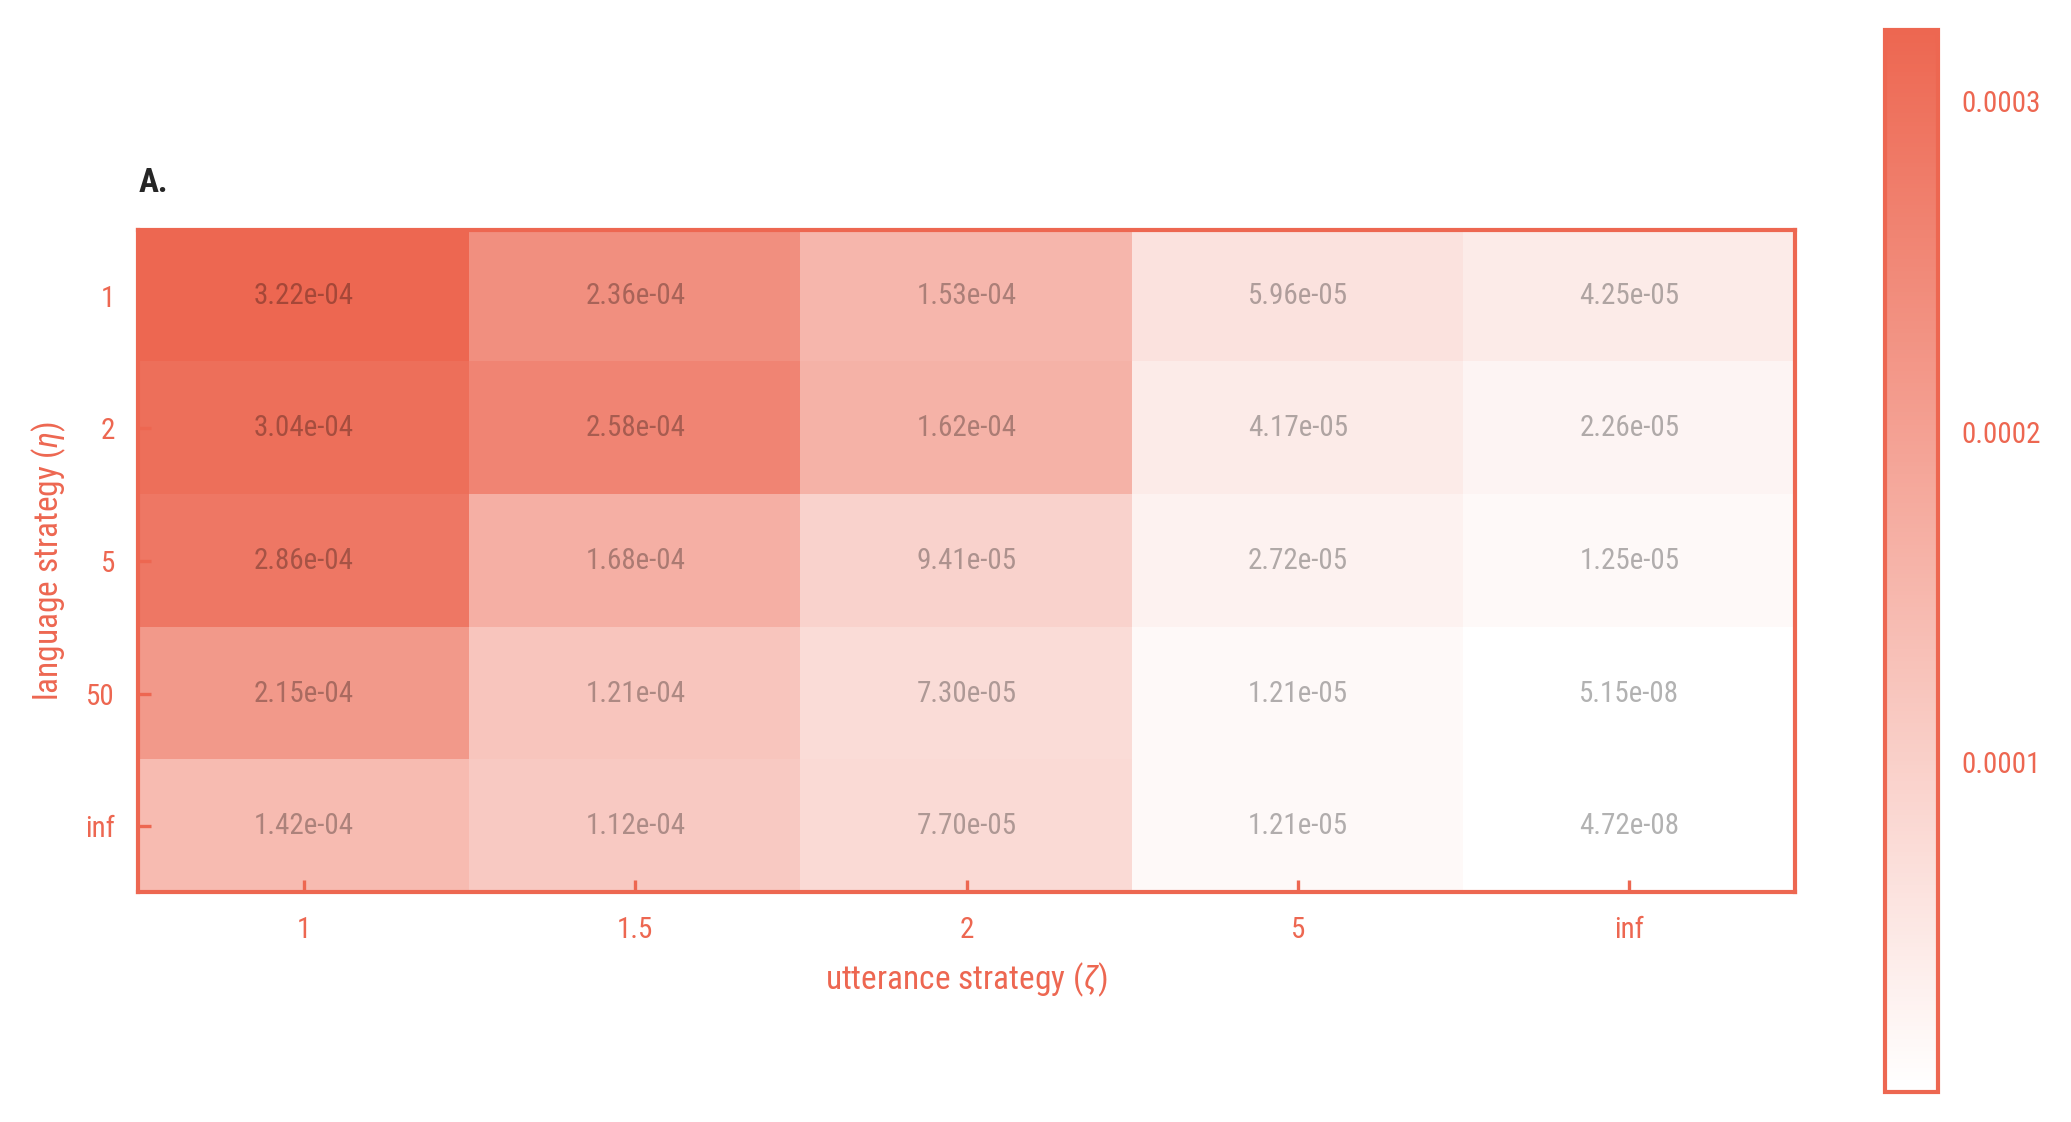

In [200]:
show_heatmap(means, 'jsd_phis')
ylabel('language strategy ($\eta$)')
xlabel('utterance strategy ($\zeta$)')

In [186]:
means.columns

Index(['jsd_phis', 'jsd_alpha_mphi', 'entropy_mphi', 'std_jsd_phis',
       'std_alpha_mphi', 'pearson_r', 'pearson_r_p_value', 'jsd_mphi_psi',
       'entropy_psi', 'jsd_psi_alpha', 'jsd_psi_slices'],
      dtype='object')

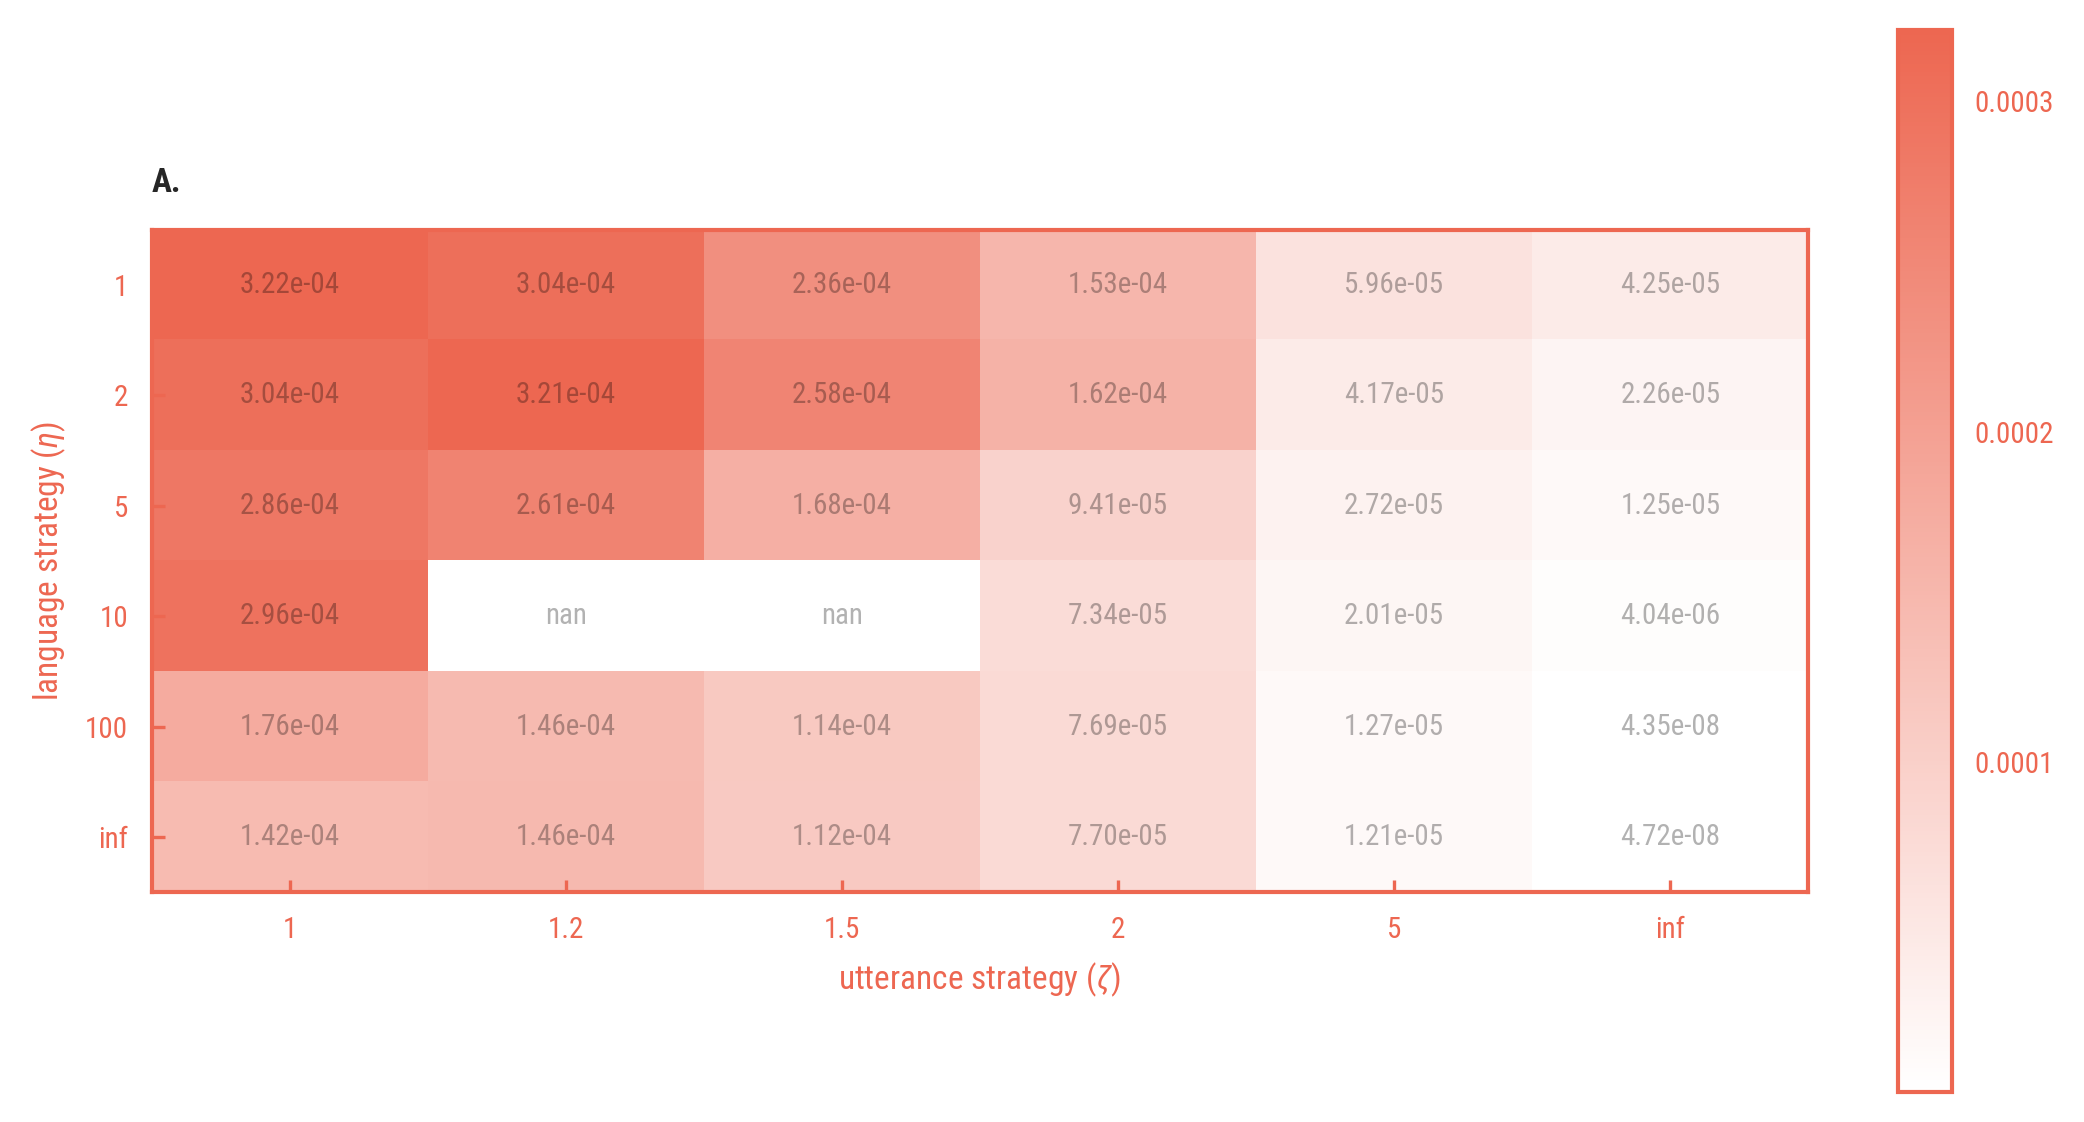

In [193]:
show_heatmap(means, 'jsd_phis')
ylabel('language strategy ($\eta$)')
xlabel('utterance strategy ($\zeta$)')

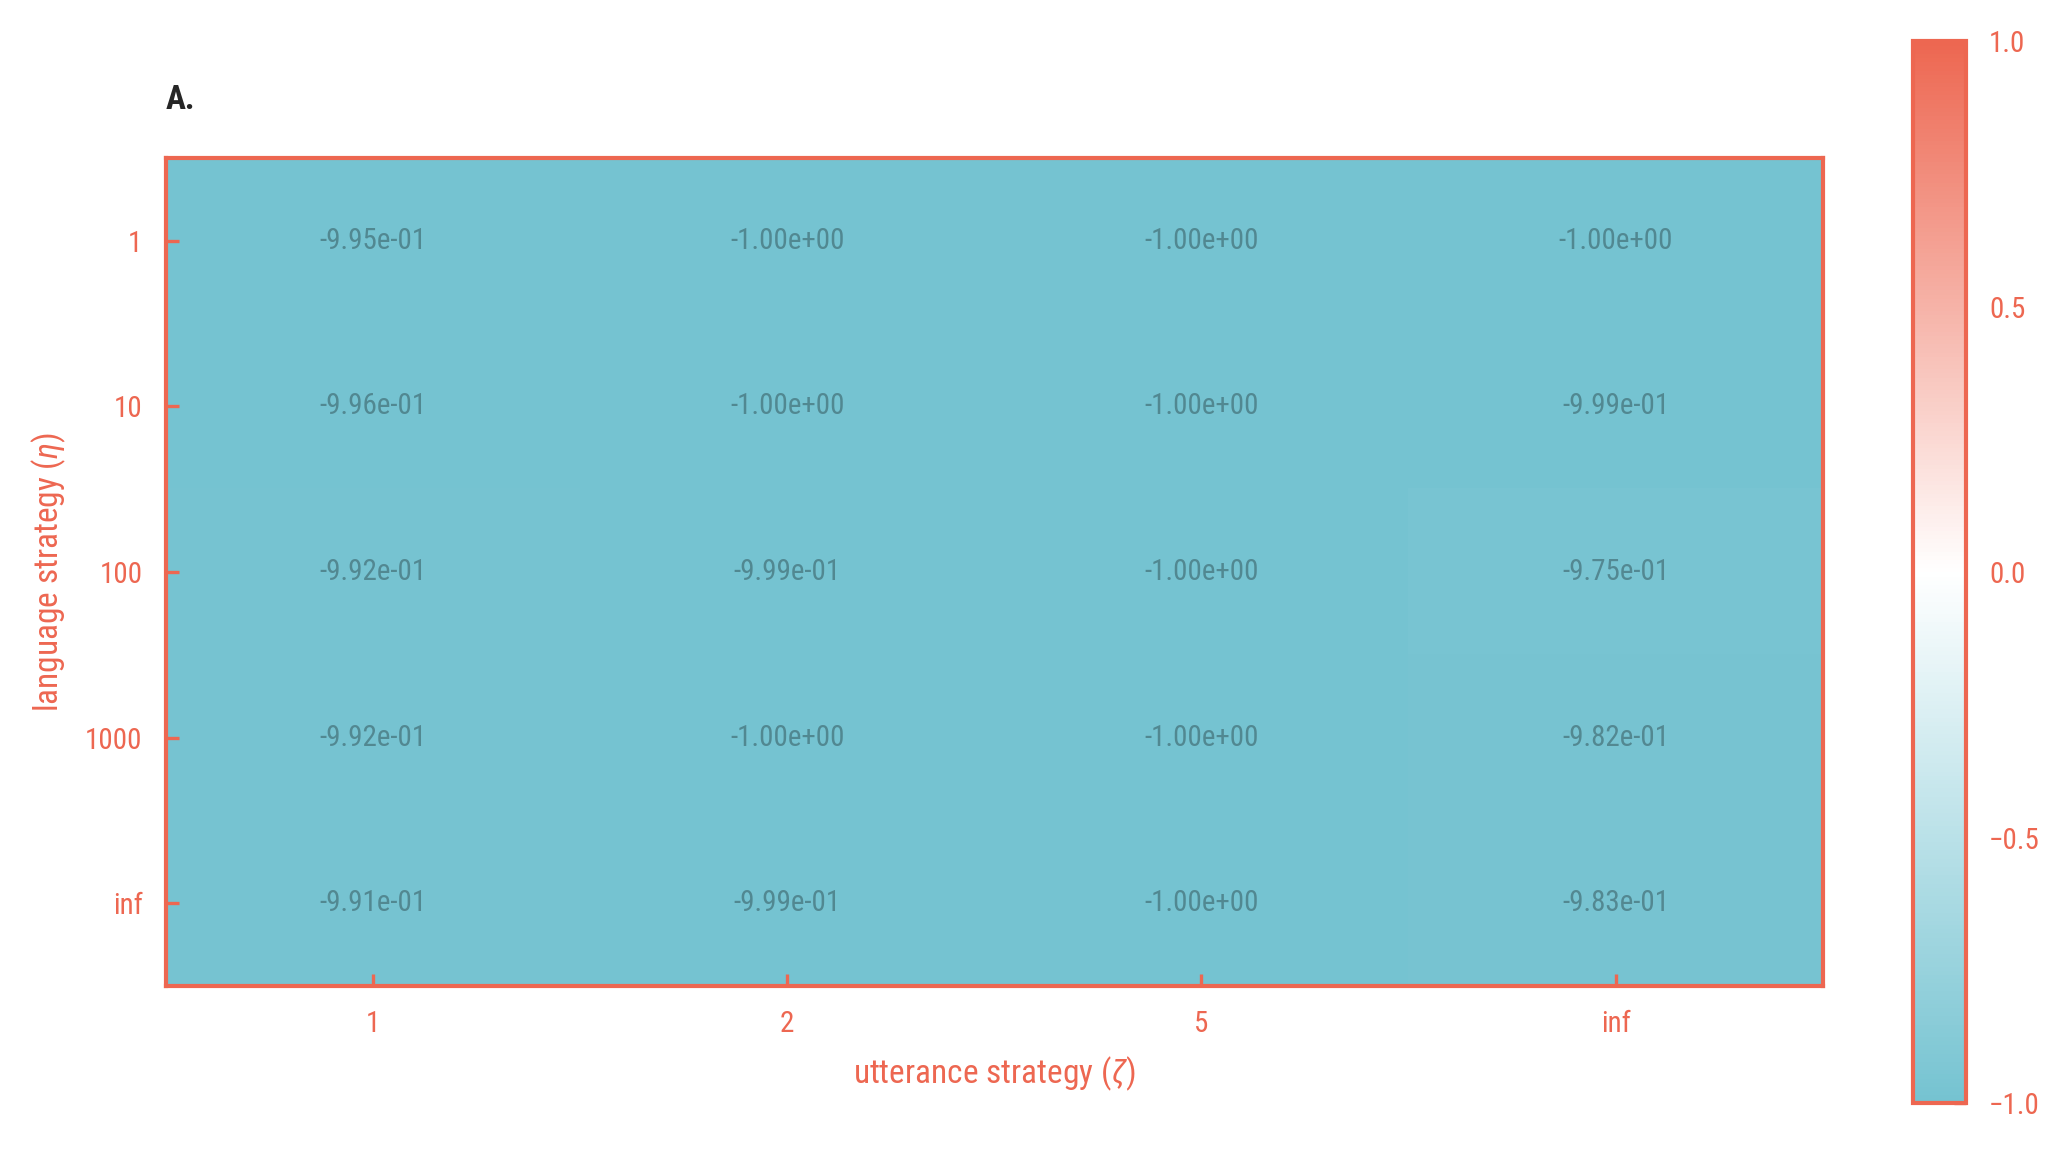

In [108]:
show_heatmap(means, 'pearson_r', {'vmin':-1, 'vmax':1, 'cmap':CustomCmap('blue', 'orange', via_rgb='white')})
ylabel('language strategy ($\eta$)')
xlabel('utterance strategy ($\zeta$)')

/Users/Bas/anaconda/envs/thesis2/lib/python3.6/site-packages/matplotlib/mathtext.py:851: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


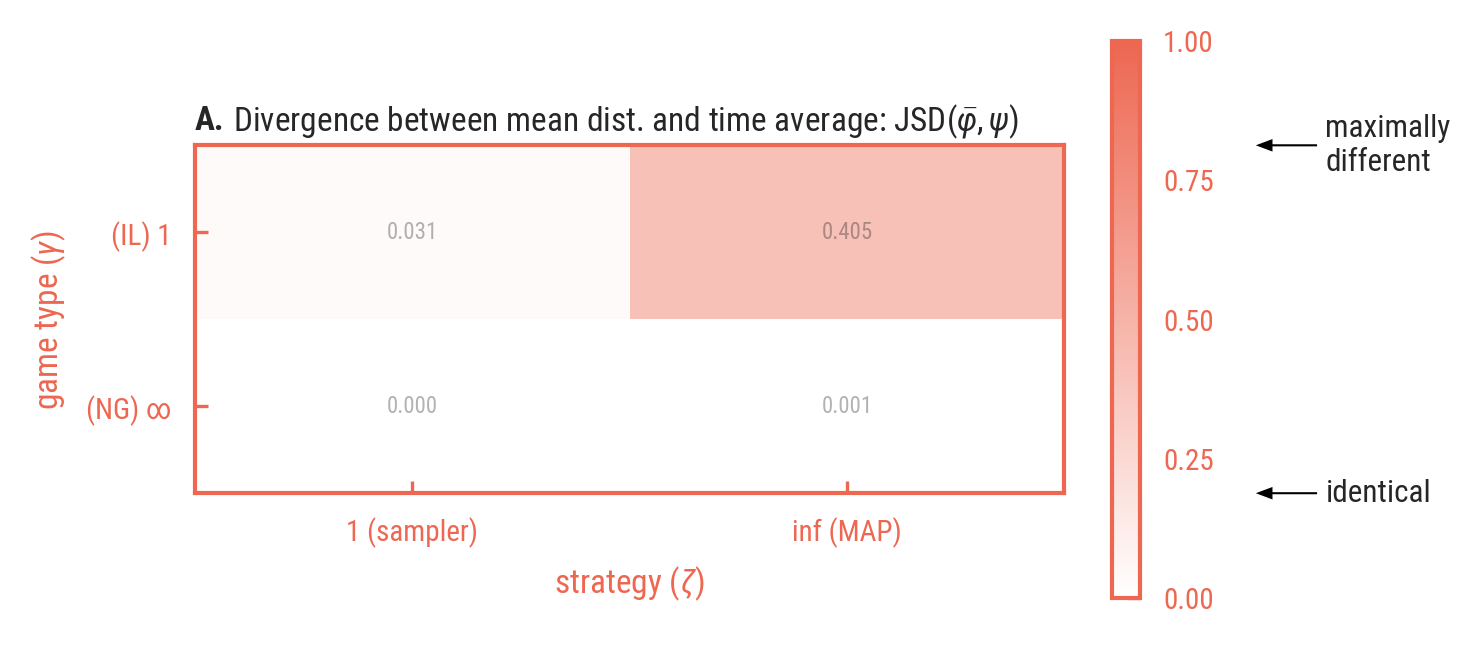

In [17]:
# Plot 

def annotate_colorbar(text, y, x=1.22):
    gca().annotate(text, xy=(x, y), xytext=(1.3, y), xycoords='axes fraction',
                fontsize = 7.5, ha='left', va='center', 
                arrowprops=dict(facecolor='black', width=.5, headlength=4, headwidth=3))

def plot_result(name, props):
    props = settings[name]
    figure(figsize=cm2inch(8,8))
    ax=gca()
    df = means[name].unstack()
    if 'cmap' in props:
        cmap = props['cmap']
    else:
        cmap = CustomCmap('white', 'orange')
    im = imshow(df, aspect=1/2.5, interpolation='none', cmap=cmap,
               vmin=props['vmin'], vmax=props['vmax'])

    # Add text to every cell
    for i, (gamma, row) in enumerate(df.iterrows()):
        for j, (zeta, val) in enumerate(row.items()):
            txt = '{:.3f}'.format(val)
            gca().text(j, i, txt, va='center', ha='center', 
                       color='k', fontsize=5.5, alpha=.3)

    # labels
    if True:

        title(props['title'])

        ylabels = ['{}'.format(g) for g in df.index[:-1].tolist()]
        ylabels += ['(NG) $\infty$']
        ylabels[0] = '(IL) '+ ylabels[0]
        yticks(arange(len(df.index)), ylabels)
        ylabel('game type ($\gamma$)')

        xlabels = ['{}'.format(z) for z in df.columns]
        xlabels[0] = xlabels[0] + ' (sampler)'
        xlabels[-1] = xlabels[-1] + ' (MAP)'
        xticks(arange(len(df.columns)), xlabels)
        xlabel('strategy ($\zeta$)')

        restyle_title(ax)
        cb = colorbar(im, fraction=0.0295)
        tick_locator = ticker.MaxNLocator(nbins=4)
        cb.locator = tick_locator
        cb.update_ticks()


        if 'annotate_cb' in props:
            for ann in props['annotate_cb']:
                annotate_colorbar(**ann)

#     subplots_adjust(left=0, bottom=0, right=1, top=1)
#     savefig('BNG05-{}-results.png'.format(name), bbox_inches='tight')

# Plot all things    
plot_result('jsd_mphi_psi')

In [ ]:
# Generate all plots
for name in settings:
    plot_result(name);